# Naive Bayes from the scratch

In [37]:
# https://www.analyticsvidhya.com/blog/2021/01/a-guide-to-the-naive-bayes-algorithm/


Naive Bayes algorithm is based on Bayes theory on conditional probability. Naive Bayes is one of the simplest algorithms. But it is not very easy to implement. Because to find individual probabilities, you have to separate the different classes, then for each feature in each class, you have to find the probability of each value of feature.


Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

# Import Libraries and Data set

In [3]:
# https://www.analyticsvidhya.com/blog/2021/01/a-guide-to-the-naive-bayes-algorithm/
#import numpy and pandas
import numpy as np
import pandas as pd


#from google.colab import drive
#drive.mount('/content/drive')

#mush = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Intellipaat/Weekend_ML_Batch/Logistic_NB/Naive_Bayes/mushrooms.csv")
#mush

mush = pd.read_csv("mushrooms.csv")
mush

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
#print column names
print(mush.columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [5]:
len(mush.columns)

23

In [6]:
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
import numpy as np
mush.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [10]:
mush["stalk-root"].value_counts()

stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: count, dtype: int64

In [ ]:
# '?' mark represents missing values. missing value count = 2480

In [11]:
# Finding %age missing values
mush["stalk-root"].value_counts(normalize=True)

stalk-root
b    0.464796
?    0.305268
e    0.137863
c    0.068439
r    0.023634
Name: proportion, dtype: float64

In [ ]:
# This indicates that around 30% of the values are missing.

In [44]:
#there is a column in our dataset which has a special character in it.
mush["stalk-root"].unique()

array(['e', 'c', 'b', 'r', '?'], dtype=object)

In [6]:
col = list(mush.columns)

for a in col:

  print("For column ->",a)
  print(mush[a].unique())
  print("-----------------------")


For column -> class
['p' 'e']
-----------------------
For column -> cap-shape
['x' 'b' 's' 'f' 'k' 'c']
-----------------------
For column -> cap-surface
['s' 'y' 'f' 'g']
-----------------------
For column -> cap-color
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
-----------------------
For column -> bruises
['t' 'f']
-----------------------
For column -> odor
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
-----------------------
For column -> gill-attachment
['f' 'a']
-----------------------
For column -> gill-spacing
['c' 'w']
-----------------------
For column -> gill-size
['n' 'b']
-----------------------
For column -> gill-color
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
-----------------------
For column -> stalk-shape
['e' 't']
-----------------------
For column -> stalk-root
['e' 'c' 'b' 'r' '?']
-----------------------
For column -> stalk-surface-above-ring
['s' 'f' 'k' 'y']
-----------------------
For column -> stalk-surface-below-ring
['s' 'f' 'y' 'k']
-----------------------
Fo

# Cleaning Data

Since the data consists of missing data with '?' as value. All the missing values are from single column. Lets remove it.

In [12]:
mush["stalk-root"].value_counts()

stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: count, dtype: int64

In [13]:
mush = mush.drop("stalk-root",axis=1)

Since we will be using this algorithm for classification, let us set the target class first

In [14]:
#set class as target
target = 'class'

In [15]:
#print all the attributes except the target
print(mush.columns[mush.columns != target])
#assign this index array to "features"
features = mush.columns[mush.columns != target]

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
       'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
       'population', 'habitat'],
      dtype='object')


In [16]:
#see the records in the target column
print(mush[target].unique())
#assign this array to "classes"
classes = mush[target].unique()

['p' 'e']


In [17]:
mush[target].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

We have got the classes as 'p' or 'e'. Let's proceed.

# Splitting dataset into test and train

In [18]:
X = mush.drop(target,axis=1)
y = mush[target]

In [19]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [20]:
X = pd.get_dummies(X,drop_first=True)
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8120,False,False,False,False,True,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
8121,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,False,True,False,False,False,False,True,False,False,...,False,False,True,False,False,True,False,False,False,False


In [21]:
from sklearn.model_selection import train_test_split

# Splitting data into training and test set: (Here test size = 0.3 means 30% data is test data)
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(5686, 91) (2438, 91)


In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [23]:
X_train

array([[-0.01875806,  1.2444408 , -0.34474751, ..., -0.40552199,
        -0.21845902, -0.15356549],
       [-0.01875806, -0.80357378, -0.34474751, ..., -0.40552199,
        -0.21845902, -0.15356549],
       [-0.01875806, -0.80357378, -0.34474751, ..., -0.40552199,
        -0.21845902, -0.15356549],
       ...,
       [-0.01875806,  1.2444408 , -0.34474751, ..., -0.40552199,
        -0.21845902, -0.15356549],
       [-0.01875806, -0.80357378, -0.34474751, ..., -0.40552199,
        -0.21845902, -0.15356549],
       [-0.01875806, -0.80357378, -0.34474751, ..., -0.40552199,
        -0.21845902, -0.15356549]])

In [24]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [25]:
# prompt: use hyperparameter tuning for the above

import numpy as np
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
param_grid = {
    'var_smoothing': np.logspace(0, 9, num=100, base=10)
}

# Create the grid search object
grid_search = GridSearchCV(classifier, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print(best_params)


{'var_smoothing': 1.5199110829529336}


In [26]:
y_pred  =  classifier.predict(X_test)

In [27]:
y_pred_prob  =  classifier.predict_proba(X_test)
y_pred_prob

array([[9.99998839e-01, 1.16078036e-06],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       ...,
       [0.00000000e+00, 1.00000000e+00],
       [9.97230297e-01, 2.76970267e-03],
       [0.00000000e+00, 1.00000000e+00]])

In [28]:
y_pred_train  =  classifier.predict(X_train)

In [29]:
y_pred

array(['e', 'p', 'p', ..., 'p', 'e', 'p'], dtype='<U1')

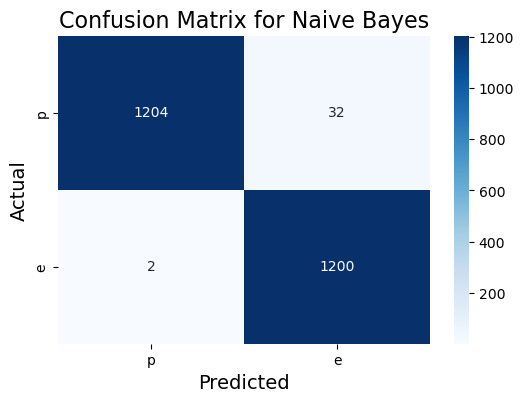

In [31]:
# prompt: use heat map for the above confusion matrix and use actual data labels

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Create a heatmap visualization of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)

# Set labels and title
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title("Confusion Matrix for Naive Bayes", fontsize=16)

# Display the heatmap
plt.show()


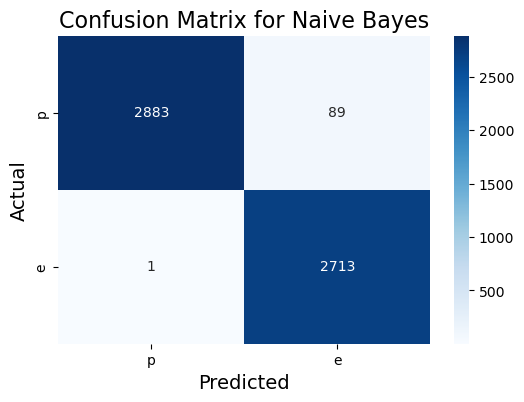

In [32]:
# prompt: use heat map for the above confusion matrix and use actual data labels

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_pred_train)

# Create a heatmap visualization of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)

# Set labels and title
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title("Confusion Matrix for Naive Bayes", fontsize=16)

# Display the heatmap
plt.show()


In [34]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_pred_train)


0.9841716496658459

In [35]:
accuracy_score(y_test,y_pred)


0.9860541427399507

In [65]:
#Still not a perfect model as we are geting 32 & 89 misclassifications that we are getting

Logistic regression

In [36]:
# Import module for fitting
from sklearn.linear_model import LogisticRegression

# Create instance (i.e. object) of LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_pred = logmodel.predict(X_test)

In [38]:
print('Accuracy: %d', (logmodel.score(X_train, y_train)))

Accuracy: %d 1.0


In [39]:
print('Accuracy: %d', (logmodel.score(X_test, y_test)))

Accuracy: %d 1.0


In [40]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, logmodel.predict(X_train))
print(confusion_matrix)

[[2972    0]
 [   0 2714]]


In [41]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1236    0]
 [   0 1202]]


In [ ]:
#we observe that there are no misclassifications.